
LUIS EDUARDO SANTANDER RODRÍGUEZ <luis.santander@udea.edu.co>
8:29 (hace 9 minutos)
para ANLLY, ESNEIDER, mí

<h2><center> Exercises </center></h2>


1. Computes the integral $$ \int_0^1 dx \frac{4}{1+x^2} $$ by Riemman sums with $N=1,10^2, 10^4,10^6, 10^8$ and gives percent error and computational time. Predict the computational time for $N=10^{12}$, and obtain the minimum $N$ for error $10^{-6}$.

<h2><center>  </center></h2>

2. An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter in the first second 
$$ N(1) = \int_0^1 e^{-t} dt$$
Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.


In [5]:
import numpy as np
import scipy.integrate as integrate
import time
import matplotlib.pyplot as plt

In [6]:
f = lambda x: 4./(1.+x**2)

In [ ]:
t_list = []
i_list = []
e_list = []
for j in range(0,9,2):
    
    t0=time.time()
    
    a=0
    b=1.
    N=10**j
    dx=(b-a)/N

    sum = 0
    n=np.arange(a,b,dx)
    for i in n:
        sum+=f(i)*dx
    error = abs(sum-np.pi)/np.pi
    
    tiempo_comp=time.time()-t0
    t_list.append(tiempo_comp)
    i_list.append(j)
    e_list.append(error)
    print("Para N=10e %d, f(x)= %.16e, error=%.2e, t=%.2e s" %(j,sum,error,tiempo_comp))

Para N=10e 0, f(x)= 4.0000000000000000e+00, error=2.73e-01, t=7.20e-05 s
Para N=10e 2, f(x)= 3.1515759869231270e+00, error=3.18e-03, t=4.91e-04 s
Para N=10e 4, f(x)= 3.1416926519231168e+00, error=3.18e-05, t=2.73e-02 s
Para N=10e 6, f(x)= 3.1415936535895672e+00, error=3.18e-07, t=1.35e+00 s


El error decrece en un factor de $10^{-N-2}$, para $10^{-16}$, N=e 18

In [ ]:
fig=plt.figure()
plt.subplot(2,1,1)
ax=plt.axes()
ax.grid()
ax.plot(i_list,e_list,'*')
ax.set_yscale('log')

plt.subplot(2,1,2)
ax=plt.axes()
ax.grid()
ax.plot(i_list,t_list,'*')
ax.set_yscale('log')
plt.show()

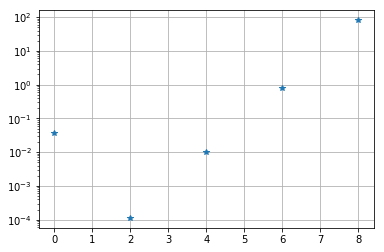

In [32]:
fig=plt.figure()
ax=plt.axes()
ax.grid()
ax.plot(i_list,t_list,'*')
ax.set_yscale('log')
plt.show()